In [4]:
import math
from math import e,pi,erf
from cmath import sqrt, log

# Input to calculate PHI_1 and PHI_2

def phi(a,rou,eta,w,t,V_0,V_hat,S_0,r):
    alpha=-(w**2+1j*w)/2
    beta=a-rou*eta*w*1j
    gamma=eta**2/2
    h=sqrt(beta**2-4*alpha*gamma)
    r_plus=(beta+h)/(eta**2)
    r_minus=(beta-h)/(eta**2)
    g=r_minus/r_plus
    log_inside=(1-g*e**(-h*t))/(1-g)
    C=a*(r_minus*t-2*log(log_inside,e)/eta**2)
    D=r_minus*(1-e**(-h*t))/(1-g*e**(-h*t))
    part_1=C*V_hat
    part_2=D*V_0
    part_3=1j*w*log(S_0*e**(r*t),e)
    phi=e**(part_1+part_2+part_3)
    return phi

# Integral part in PHI_1 and PHI_2

def int_inside_1(a,rou,eta,w,t,V_0,V_hat,S_0,r,K):
    top_1=e**(-1j*w*log(K,e))
    top_2=phi(a,rou,eta,w-1j,t,V_0,V_hat,S_0,r)
    bottom=1j*w*phi(a,rou,eta,-1j,t,V_0,V_hat,S_0,r)
    res=top_1*top_2/bottom
    return res.real

def int_inside_2(a,rou,eta,w,t,V_0,V_hat,S_0,r,K):
    top_1=e**(-1j*w*log(K,e))
    top_2=phi(a,rou,eta,w,t,V_0,V_hat,S_0,r)
    bottom=1j*w
    res=top_1*top_2/bottom
    return res.real

def int_PHI_1(a,rou,eta,t,V_0,V_hat,S_0,r,K,A,B,n,aFunction):
    res=aFunction(A,B,int_inside_1,n,a,rou,eta,t,V_0,V_hat,S_0,r,K)/pi
    res=res+1/2
    return res
        
def int_PHI_2(a,rou,eta,t,V_0,V_hat,S_0,r,K,A,B,n,aFunction):
    res=aFunction(A,B,int_inside_2,n,a,rou,eta,t,V_0,V_hat,S_0,r,K)/pi
    res=res+1/2
    return res

# Numerical Integrating methods

def composite_mid_point(A,B,aFunction,n,a,rou,eta,t,V_0,V_hat,S_0,r,K):
    h=(B-A)/(n+2)
    sum_f=0
    for j in range(int((n/2)+1)):
        w=A+(2*j+1)*h
        sum_f+=aFunction(a,rou,eta,w,t,V_0,V_hat,S_0,r,K)
    return 2*h*sum_f

def composite_simpsons(A,B,aFunction,n,a,rou,eta,t,V_0,V_hat,S_0,r,K):
    h=(B-A)/n
    sum_1=0
    sum_2=0
    sum_0=aFunction(a,rou,eta,A+h/100,t,V_0,V_hat,S_0,r,K)+aFunction(a,rou,eta,B,t,V_0,V_hat,S_0,r,K)
    for i in range(1,n):
        w=A+i*h
        if i%2==0:
            sum_2+=aFunction(a,rou,eta,w,t,V_0,V_hat,S_0,r,K)
        else:
            sum_1+=aFunction(a,rou,eta,w,t,V_0,V_hat,S_0,r,K)
    I=h*(sum_0+2*sum_2+4*sum_1)/3
    return I

def composite_trapezoidal(A,B,aFunction,n,a,rou,eta,t,V_0,V_hat,S_0,r,K):
    h=(B-A)/(n+2)
    sum_f=aFunction(a,rou,eta,A+h/100,t,V_0,V_hat,S_0,r,K)+aFunction(a,rou,eta,B,t,V_0,V_hat,S_0,r,K)
    for j in range(1,n):
        w=A+j*h
        sum_f+=2*aFunction(a,rou,eta,w,t,V_0,V_hat,S_0,r,K)
    return h*sum_f/2

# Value of Option

def err(x,y):
    return abs(x-y)

def C_0(a,rou,eta,t,V_0,V_hat,S_0,r,K,A,B,n,aFunction,actual_value):
    T=10
    PHI_1=int_PHI_1(a,rou,eta,t,V_0,V_hat,S_0,r,K,A,B,n,aFunction)
    PHI_2=int_PHI_2(a,rou,eta,t,V_0,V_hat,S_0,r,K,A,B,n,aFunction)
    C0=S_0*PHI_1-e**(-r*T)*K*PHI_2
    error=err(actual_value,C0)
    res=[C0,error]
    return res
    

# BS model

import numpy as np
import scipy.stats as si
from sympy.stats import Normal,cdf

def bs(S,K,T,r,sigma,actual_value):
    d1=(np.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S/K)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    C_0=(S*si.norm.cdf(d1,0,1)-K*np.exp(-r*T)*si.norm.cdf(d2,0,1))
    error=err(actual_value,C_0)
    res=[C_0,error]
    return res



In [5]:
# data: t=24/365

S_0=425.73
K1=395
K2=400
K3=405
K4=410
K5=415
V_0=6.47*10**(-5)
V_hat=6.47*10**(-5)
a=6.57*10**(-3)
eta=5.09*10**(-4)
rou=-1.98*10**(-3)
t1=24/365
r=6.4*10**(-4)

print("Results are presented in this form: [Approximated value, Absolute error]")
print("————————————————————————")
print("K1=395")
print("Actual value: 36.75")
print("Composite Mid Point: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K1,0,100,498,composite_mid_point,36.75))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K1,0,100,500,composite_trapezoidal,36.75))
print("Composite Simpsons: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K1,0,100,500,composite_simpsons,36.75))
print("Black-Schole model: ",bs(S_0,K1,t1,r,V_0,36.75))
print("————————————————————————")
print("K2=400")
print("Actual value: 27.88")
print("Composite Mid Point: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K2,0,100,498,composite_mid_point,27.88))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K2,0,100,500,composite_trapezoidal,27.88))
print("Composite Simpsons: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K2,0,100,500,composite_simpsons,27.88))
print("Black-Schole model: ",bs(S_0,K2,t1,r,V_0,27.88))
print("————————————————————————")
print("K3=405")
print("Actual value: 25.0")
print("Composite Mid Point: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K3,0,100,498,composite_mid_point,25.0))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K3,0,100,500,composite_trapezoidal,25.0))
print("Composite Simpsons: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K3,0,100,500,composite_simpsons,25.0))
print("Black-Schole model: ",bs(S_0,K3,t1,r,V_0,25.0))
print("————————————————————————")
print("K4=410")
print("Actual value: 17.5")
print("Composite Mid Point: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K4,0,100,498,composite_mid_point,17.5))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K4,0,100,500,composite_trapezoidal,17.5))
print("Composite Simpsons: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K4,0,100,500,composite_simpsons,17.5))
print("Black-Schole model: ",bs(S_0,K4,t1,r,V_0,17.5))
print("————————————————————————")
print("K5=415")
print("Actual value: 15.88")
print("Composite Mid Point: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K5,0,100,498,composite_mid_point,15.88))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K5,0,100,500,composite_trapezoidal,15.88))
print("Composite Simpsons: ",C_0(a,rou,eta,t1,V_0,V_hat,S_0,r,K5,0,100,500,composite_simpsons,15.88))
print("Black-Schole model: ",bs(S_0,K5,t1,r,V_0,15.88))




Results are presented in this form: [Approximated value, Absolute error]
————————————————————————
K1=395
Actual value: 36.75
Composite Mid Point:  [32.62214985273221, 4.127850147267793]
Composite Trapezoidal:  [32.58363664766216, 4.166363352337839]
Composite Simpsons:  [32.62216098733876, 4.127839012661241]
Black-Schole model:  [30.746622116003437, 6.0033778839965635]
————————————————————————
K2=400
Actual value: 27.88
Composite Mid Point:  [26.939224726199427, 0.9407752738005719]
Composite Trapezoidal:  [26.94129950026047, 0.9387004997395287]
Composite Simpsons:  [26.939261624799883, 0.9407383752001159]
Black-Schole model:  [25.7468325225351, 2.133167477464898]
————————————————————————
K3=405
Actual value: 25.0
Composite Mid Point:  [23.168593352506946, 1.8314066474930542]
Composite Trapezoidal:  [23.19654454480485, 1.8034554551951487]
Composite Simpsons:  [23.16860514687562, 1.8313948531243796]
Black-Schole model:  [20.747042929066822, 4.252957070933178]
————————————————————————
K4=4

In [6]:
approximated_simpsons_1=[32.62216098733876,26.939261624799883,23.16860514687562,19.644116911943627,14.292567284340805]
approximated_midpoint_1=[32.6699501125409,26.939224726199427,23.168593352506946,19.644126125030084,14.292574859760066]
approximated_trapezoidal_1=[32.58363664766216,26.94129950026047,23.190330352404487,19.657495280005094,14.283445905792007]
approximated_bs_1=[30.746622116003437,25.7468325225351,20.747042929066822,15.747253335598487,10.747463742130208]
actual1=[36.75,27.88,25.0,17.5,15.88]
strike=[395,400,405,410,415]
error_K1=[4.127850147267793,4.166363352337839,4.127839012661241,6.0033778839965635]

In [7]:
# data: t=87/365

t2=87/365

print("Results are presented in this form: [Approximated value, Absolute error]")
print("————————————————————————")
print("K1=395")
print("Actual value: 33.0")
print("Composite Mid Point: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K1,0,100,498,composite_mid_point,33.0))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K1,0,100,500,composite_trapezoidal,33.0))
print("Composite Simpsons: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K1,0,100,500,composite_simpsons,33.0))
print("Black-Schole model: ",bs(S_0,K1,t2,r,V_0,33.0))
print("————————————————————————")
print("K2=400")
print("Actual value: 28.5")
print("Composite Mid Point: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K2,0,100,498,composite_mid_point,28.5))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K2,0,100,500,composite_trapezoidal,28.5))
print("Composite Simpsons: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K2,0,100,500,composite_simpsons,28.5))
print("Black-Schole model: ",bs(S_0,K2,t2,r,V_0,28.5))
print("————————————————————————")
print("K3=405")
print("Actual value: 24.13")
print("Composite Mid Point: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K3,0,100,498,composite_mid_point,24.13))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K3,0,100,500,composite_trapezoidal,24.13))
print("Composite Simpsons: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K3,0,100,500,composite_simpsons,24.13))
print("Black-Schole model: ",bs(S_0,K3,t2,r,V_0,24.13))
print("————————————————————————")
print("K4=410")
print("Actual value: 20.38")
print("Composite Mid Point: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K4,0,100,498,composite_mid_point,20.38))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K4,0,100,500,composite_trapezoidal,20.38))
print("Composite Simpsons: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K4,0,100,500,composite_simpsons,20.38))
print("Black-Schole model: ",bs(S_0,K4,t2,r,V_0,20.38))
print("————————————————————————")
print("K5=415")
print("Actual value: 16.13")
print("Composite Mid Point: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K5,0,100,498,composite_mid_point,16.13))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K5,0,100,500,composite_trapezoidal,16.13))
print("Composite Simpsons: ",C_0(a,rou,eta,t2,V_0,V_hat,S_0,r,K5,0,100,500,composite_simpsons,16.13))
print("Black-Schole model: ",bs(S_0,K5,t2,r,V_0,16.13))

Results are presented in this form: [Approximated value, Absolute error]
————————————————————————
K1=395
Actual value: 33.0
Composite Mid Point:  [32.6699501125409, 0.33004988745909714]
Composite Trapezoidal:  [32.63316406116246, 0.3668359388375393]
Composite Simpsons:  [32.669958806198395, 0.33004119380160546]
Black-Schole model:  [30.790251842591942, 2.2097481574080575]
————————————————————————
K2=400
Actual value: 28.5
Composite Mid Point:  [27.014673488813685, 1.4853265111863152]
Composite Trapezoidal:  [27.015730684910636, 1.4842693150893638]
Composite Simpsons:  [27.014708416059932, 1.485291583940068]
Black-Schole model:  [25.791014524143748, 2.7089854758562524]
————————————————————————
K3=405
Actual value: 24.13
Composite Mid Point:  [23.164120593996074, 0.9658794060039249]
Composite Trapezoidal:  [23.190330352404487, 0.9396696475955117]
Composite Simpsons:  [23.164132909109185, 0.9658670908908142]
Black-Schole model:  [20.791777205695553, 3.3382227943044462]
———————————————————

In [8]:
approximated_simpsons2=[32.669958806198395,27.014708416059932,23.164132909109185,19.55899563016584,14.240443592334543]
approximated_midpoint2=[32.6699501125409,27.014673488813685,23.164120593996074,19.55899563016584,14.240443592334543]
approximated_trapezoidal2=[32.63316406116246,27.015730684910636,23.190330352404487,19.572286540979178,14.232419701986771]
approximated_bs2=[30.790251842591942,25.791014524143748,20.791777205695553,15.792539887247301,10.793302568799106]
actual2=[33.0,28.5,24.13,20.38,16.13]
strike=[395,400,405,410,415]

In [6]:
# data: t=115/365

K1=380
K2=390
K3=400
K4=410
K5=420
t3=115/365

print("Results are presented in this form: [Approximated value, Absolute error]")
print("————————————————————————")
print("K1=380")
print("Actual value: 47.25")
print("Composite Mid Point: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K1,0,100,498,composite_mid_point,47.25))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K1,0,100,500,composite_trapezoidal,47.25))
print("Composite Simpsons: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K1,0,100,500,composite_simpsons,47.25))
print("Black-Schole model: ",bs(S_0,K1,t3,r,V_0,47.25))
print("————————————————————————")
print("K2=390")
print("Actual value: 38.13")
print("Composite Mid Point: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K2,0,100,498,composite_mid_point,38.13))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K1,0,100,500,composite_trapezoidal,38.13))
print("Composite Simpsons: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K2,0,100,500,composite_simpsons,38.13))
print("Black-Schole model: ",bs(S_0,K2,t3,r,V_0,38.13))
print("————————————————————————")
print("K3=400")
print("Actual value: 29.38")
print("Composite Mid Point: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K3,0,100,498,composite_mid_point,29.38))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K3,0,100,500,composite_trapezoidal,29.38))
print("Composite Simpsons: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K3,0,100,500,composite_simpsons,29.38))
print("Black-Schole model: ",bs(S_0,K3,t3,r,V_0,29.38))
print("————————————————————————")
print("K4=410")
print("Actual value: 21.19")
print("Composite Mid Point: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K4,0,100,498,composite_mid_point,21.19))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K4,0,100,500,composite_trapezoidal,21.19))
print("Composite Simpsons: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K4,0,100,500,composite_simpsons,21.19))
print("Black-Schole model: ",bs(S_0,K4,t3,r,V_0,21.19))
print("————————————————————————")
print("K5=420")
print("Actual value: 13.88")
print("Composite Mid Point: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K5,0,100,498,composite_mid_point,13.88))
print("Composite Trapezoidal: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K5,0,100,500,composite_trapezoidal,13.88))
print("Composite Simpsons: ",C_0(a,rou,eta,t3,V_0,V_hat,S_0,r,K5,0,100,500,composite_simpsons,13.88))
print("Black-Schole model: ",bs(S_0,K5,t3,r,V_0,13.88))

Results are presented in this form: [Approximated value, Absolute error]
————————————————————————
K1=380
Actual value: 47.25
Composite Mid Point:  [47.79677624181414, 0.5467762418141433]
Composite Trapezoidal:  [47.848442647751426, 0.5984426477514262]
Composite Simpsons:  [47.796827914383414, 0.5468279143834138]
Black-Schole model:  [45.80661693260856, 1.4433830673914372]
————————————————————————
K2=390
Actual value: 38.13
Composite Mid Point:  [39.116702390071225, 0.9867023900712226]
Composite Trapezoidal:  [47.848442647751426, 9.718442647751424]
Composite Simpsons:  [39.11664466162614, 0.9866446616261371]
Black-Schole model:  [35.808633167677215, 2.321366832322788]
————————————————————————
K3=400
Actual value: 29.38
Composite Mid Point:  [27.046876141950463, 2.333123858049536]
Composite Trapezoidal:  [27.047514648837534, 2.3324853511624646]
Composite Simpsons:  [27.04691021139365, 2.3330897886063475]
Black-Schole model:  [25.810649402745867, 3.5693505972541324]
——————————————————————

In [7]:
approximated_simpsons3=[47.796827914383414,39.11664466162614,27.04691021139365,19.522823715934976,7.611009737366203]
approximated_midpoint3=[47.79677624181414,39.116702390071225,27.046876141950463,19.52283142752873,7.611011438483729]
approximated_trapezoidal3=[47.848442647751426,39.090257591932414,27.047514648837534,19.53606336179496,7.601339732754695,]
approximated_bs3=[45.80661693260856,35.808633167677215,25.810649402745867,15.812665637814519,5.81468187288317]
actual3=[47.25,38.13,29.38,21.19,13.88]
strike=[380,390,400,410,420]

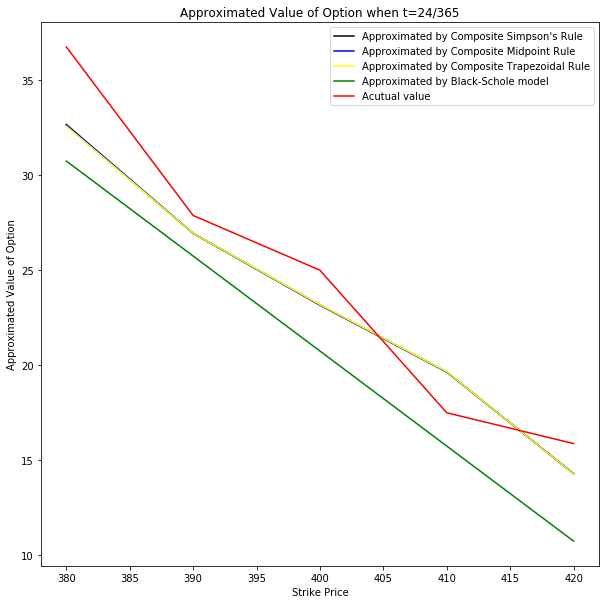

In [9]:
# ploting the results above
import numpy as np
import matplotlib.pyplot as plt

# Given the results above, we have the following graphs for t=24/365

plt.figure( figsize=(10,10))
plt.title("Approximated Value of Option when t=24/365")
plt.plot(strike,approximated_simpsons_1,'-',color="black",label="Approximated by Composite Simpson's Rule") 
plt.plot(strike,approximated_midpoint_1,'-',color="blue",label="Approximated by Composite Midpoint Rule") 
plt.plot(strike,approximated_trapezoidal_1,'-',color="yellow",label="Approximated by Composite Trapezoidal Rule") 
plt.plot(strike,approximated_bs_1,'-',color="green",label="Approximated by Black-Schole model") 
plt.plot(strike,actual1,'-',color="red",label="Acutual value")
plt.xlabel("Strike Price")
plt.ylabel("Approximated Value of Option")
plt.legend(loc="upper right")
plt.show()

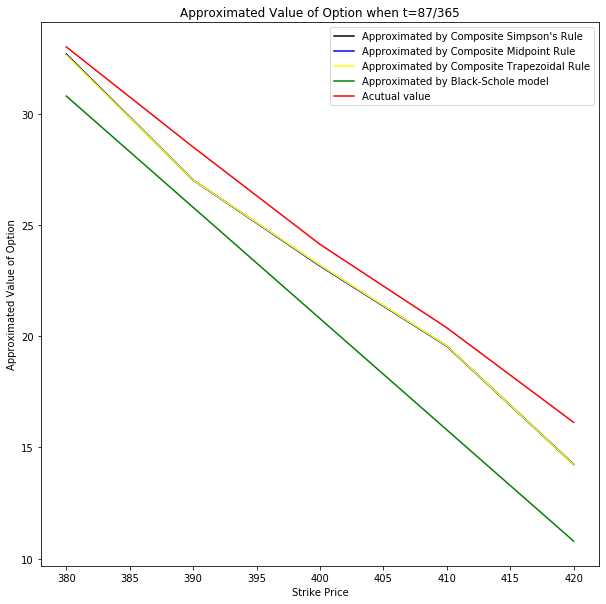

In [10]:
# Given the results above, we have the following graphs for t=87/365

plt.figure( figsize=(10,10))
plt.title("Approximated Value of Option when t=87/365")
plt.plot(strike,approximated_simpsons2,'-',color="black",label="Approximated by Composite Simpson's Rule") 
plt.plot(strike,approximated_midpoint2,'-',color="blue",label="Approximated by Composite Midpoint Rule") 
plt.plot(strike,approximated_trapezoidal2,'-',color="yellow",label="Approximated by Composite Trapezoidal Rule") 
plt.plot(strike,approximated_bs2,'-',color="green",label="Approximated by Black-Schole model") 
plt.plot(strike,actual2,'-',color="red",label="Acutual value")
plt.xlabel("Strike Price")
plt.ylabel("Approximated Value of Option")
plt.legend(loc="upper right")
plt.show()

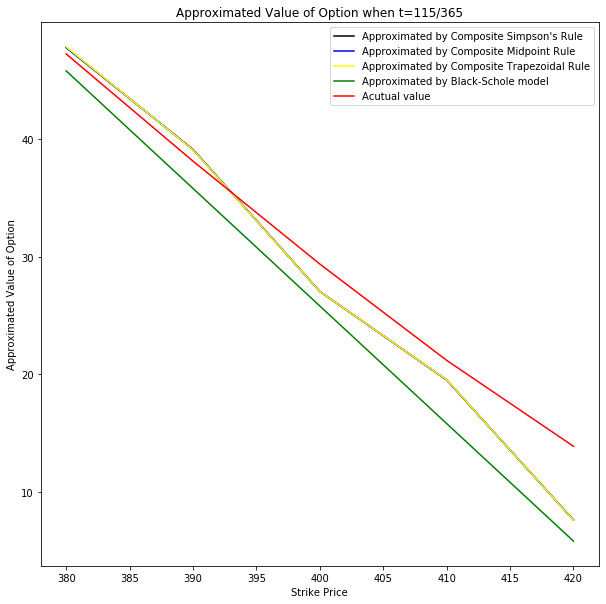

In [11]:
# Given the results above, we have the following graphs for t=115/365

plt.figure( figsize=(10,10))
plt.title("Approximated Value of Option when t=115/365")
plt.plot(strike,approximated_simpsons3,'-',color="black",label="Approximated by Composite Simpson's Rule") 
plt.plot(strike,approximated_midpoint3,'-',color="blue",label="Approximated by Composite Midpoint Rule") 
plt.plot(strike,approximated_trapezoidal3,'-',color="yellow",label="Approximated by Composite Trapezoidal Rule") 
plt.plot(strike,approximated_bs3,'-',color="green",label="Approximated by Black-Schole model") 
plt.plot(strike,actual3,'-',color="red",label="Acutual value")
plt.xlabel("Strike Price")
plt.ylabel("Approximated Value of Option")
plt.legend(loc="upper right")
plt.show()